Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio

In [2]:
img = imageio.imread('20230402_225116.jpg')

In [3]:
img.shape

(756, 1008, 3)

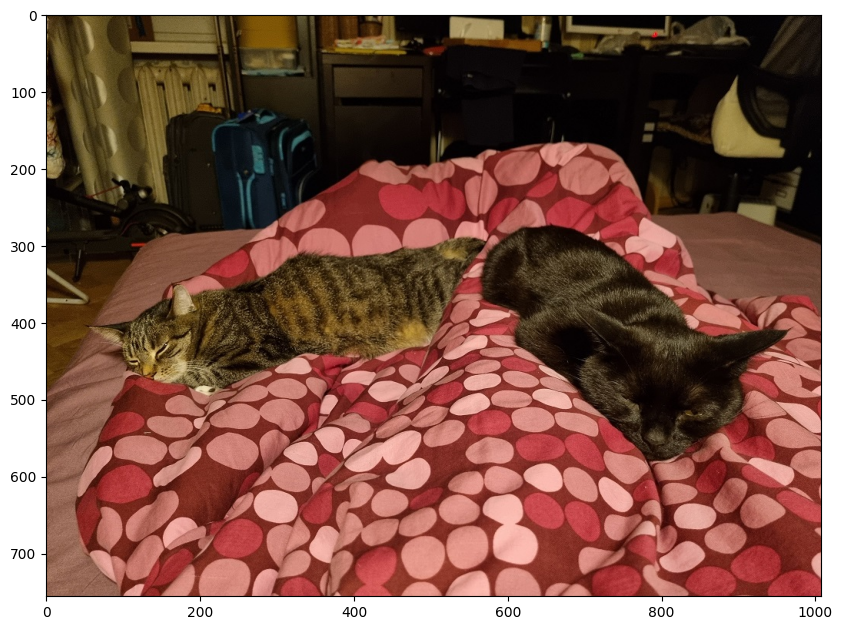

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img);

*line filters*

In [5]:
line_filt = np.array([
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1]
              ])

out_img = np.zeros(
    (img.shape[0] - line_filt.shape[0] + 1,
     img.shape[1] - line_filt.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + line_filt.shape[0], j: j + line_filt.shape[1], k]
            out_img[i, j, k] = np.sum(line_filt * x)

In [6]:
out_img = out_img.astype(np.uint8)

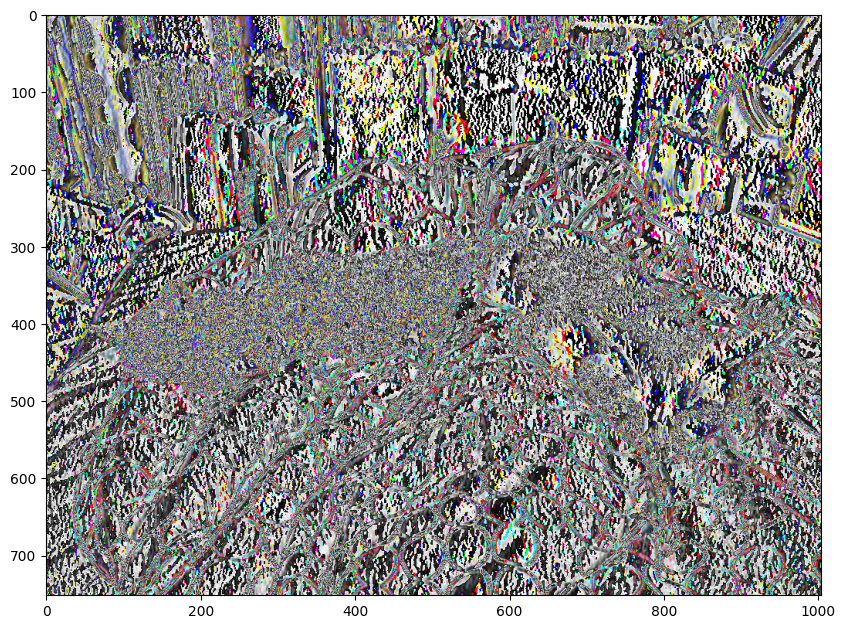

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);

In [8]:
line_filt_02 = (line_filt + line_filt.T) /2

out_img = np.zeros(
    (img.shape[0] - line_filt_02.shape[0] + 1,
     img.shape[1] - line_filt_02.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + line_filt_02.shape[0], j: j + line_filt_02.shape[1], k]
            out_img[i, j, k] = np.sum(line_filt_02 * x)

In [9]:
out_img = out_img.astype(np.uint8)

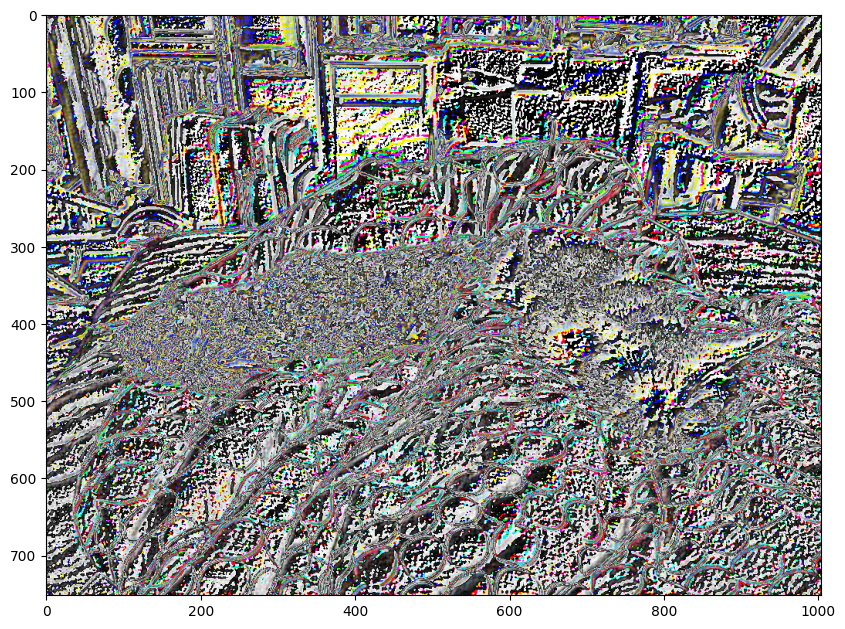

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);

*lines are definitely detected*

*blurring*

In [11]:
# Box Blur
win_size = (11, 11)
w = np.ones(win_size, dtype=np.float32)
w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + w.shape[0], j: j + w.shape[1], k]
            out_img[i, j, k] = np.sum(w * x)

In [12]:
out_img = out_img.astype(np.uint8)

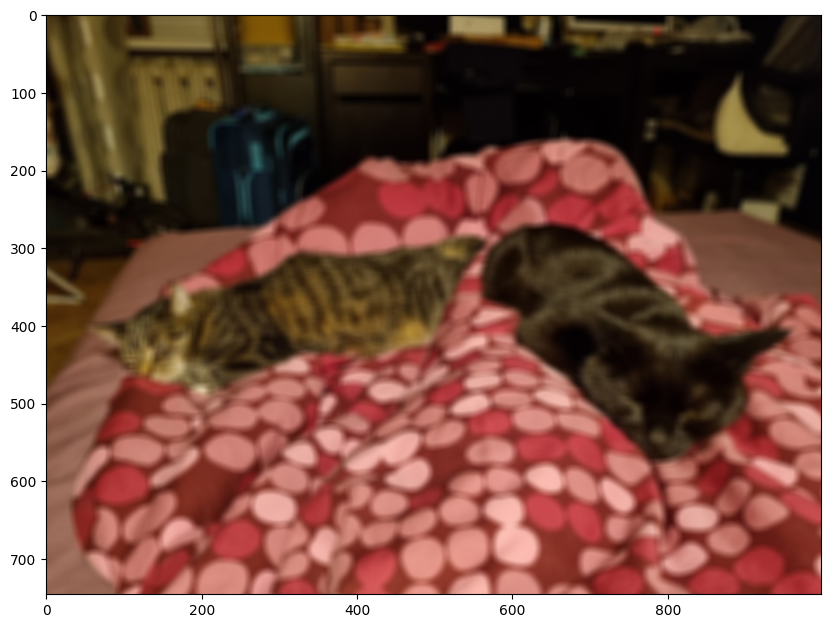

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);

In [14]:
# Gaussian blur
win_size = (11, 11)
sigma = 3
w = np.ones(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i, j] = np.exp(- (i - w.shape[0] // 2)**2 / sigma**2 / 2
                         - (j - w.shape[1] // 2)**2 / sigma**2 / 2)
w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)
for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + w.shape[0], j: j + w.shape[1], k]
            out_img[i, j, k] = np.sum(w * x)

In [15]:
out_img = out_img.astype(np.uint8)

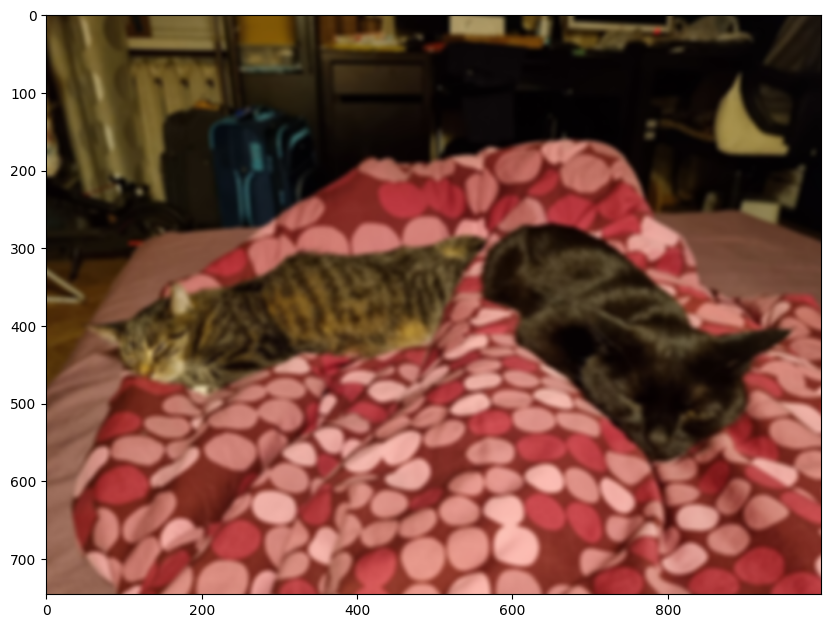

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(out_img);